# **Supermarket Customer Campaign and Spending Analysis**
### Nama : Vanessa Alexandra
### No : JCDS-2804-014

## **Latar Belakang**

Dalam industri ritel modern seperti supermarket, strategi pemasaran yang efektif menjadi salah satu kunci utama dalam meningkatkan penjualan dan mempertahankan pelanggan. Salah satu bentuk strategi yang umum dilakukan adalah melalui campaign atau promosi yang bertujuan untuk menarik minat pelanggan agar melakukan pembelian dalam jumlah lebih besar atau lebih sering. Namun, tidak semua campaign memberikan hasil yang diharapkan. Oleh karena itu, penting bagi perusahaan untuk melakukan evaluasi terhadap efektivitas campaign yang telah dijalankan. Dengan memahami bagaimana pelanggan merespon campaign dan bagaimana karakteristik pelanggan yang cenderung memiliki pengeluaran tinggi, perusahaan dapat menyusun strategi pemasaran yang lebih tepat sasaran dan efisien. Melalui analisis data pelanggan yang tersedia, perusahaan dapat memperoleh insight yang berguna untuk pengambilan keputusan yang berbasis data (data-driven decision making).

## **Pernyataan Masalah**

Berdasarkan latar belakang tersebut, terdapat beberapa pertanyaan yang ingin dijawab melalui analisis data sebagai berikut:
1. Apakah campaign yang dijalankan oleh supermarket berdampak terhadap total pengeluaran pelanggan?
2. Bagaimana perbedaan spending pelanggan berdasarkan karakteristik demografis seperti usia, status hubungan, dan tingkat pendidikan?
3. Segmentasi pelanggan seperti apa yang memiliki pengeluaran tertinggi?
4. Campaign seperti apa yang paling efektif untuk mendorong peningkatan pembelian dari segmen pelanggan tertentu?

## **Goals**

1. Mengetahui efektivitas campaign atau promosi yang sedang dijalankan.
2. Melihat target market mana yang paling responsif terhadap campaign tertentu.
3. Menentukan strategi campaign selanjutnya berdasarkan perilaku spending customer.

## **Stakeholder**

Analisis ini ditujukan untuk Tim Marketing yang mana berkaitan dengan Goals di atas.


## **Import Library & Load Dataset**

Untuk menjawab pertanyaan di atas, kita akan menganalisa data Customer yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK?usp=sharing)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, shapiro
from datetime import datetime

In [2]:
df=pd.read_csv('Supermarket Customers.csv', delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Dataset ini berisi informasi terkait demografi, pola pembelian, serta respons terhadap kampanye pemasaran. Ada 29 kolom di dalam dataset Supermarket Customers, yaitu:

### Data Demografi Customer
`ID` : ID Customer

`Year_Birth` : Tahun lahir Customer

`Education` : Tingkat pendidikan Customer

`Marital_Status` : Status pernikahan Customer

`Income` : Pendapatan Customer per tahun

### Data Keluarga Customer 
`Kidhome` : Jumlah anak kecil di rumah Customer

`Teenhome` : Jumlah remaja di rumah Customer

### Informasi Keanggotaan Customer
`Dt_Customer` : Tanggal Customer mendaftar

`Recency` : Hari sejak terakhir kali Customer berbelanja

### Pengeluaran Customer per Kategori Produk
`MntWines`: Pengeluaran untuk Wines

`MntFruits`: Pengeluaran untuk Fruits

`MntMeatProducts`: Pengeluaran untuk Meat Products

`MntFishProducts`: Pengeluaran untuk Fish Products

`MntSweetProducts`: Pengeluaran untuk Sweet Products

`MntGoldProds`: Pengeluaran untuk Gold Products

### Promotion
`NumDealsPurchases`: Jumlah pembelian dengan diskon

`AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`: Indikator apakah Customer menerima kampanye pemasaran

`Response`: Respon terhadap kampanye pemasaran terbaru


### Place
`NumWebPurchases`: Jumlah pembelian melalui Website

`NumCatalogPurchases`: Jumlah pembelian melalui Catalog

`NumStorePurchases`: Jumlah pembelian langsung di Store

`NumWebVisitsMonth`: Jumlah kunjungan ke website dalam sebulan

### Complain
`Complain` : Apakah pelanggan pernah mengajukan keluhan

### Lainnya 
`Z_CostContact` dan `Z_Revenue`

## **Data Understanding dan Cleaning**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [5]:
pd.set_option('display.max_colwidth', 1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelDesc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

### **Duplicated Data**
Akan diperiksa apakah ada data yang duplikat

In [6]:
df.duplicated().sum()

np.int64(0)

### **Missing Data**

In [7]:
df.isnull().sum()

ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64

In [8]:
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

### **Not Missing but Wrong Data**

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [10]:
df.dtypes

ID                     int64         
Year_Birth             int64         
Education              object        
Marital_Status         object        
Income                 float64       
Kidhome                int64         
Teenhome               int64         
Dt_Customer            datetime64[ns]
Recency                int64         
MntWines               int64         
MntFruits              int64         
MntMeatProducts        int64         
MntFishProducts        int64         
MntSweetProducts       int64         
MntGoldProds           int64         
NumDealsPurchases      int64         
NumWebPurchases        int64         
NumCatalogPurchases    int64         
NumStorePurchases      int64         
NumWebVisitsMonth      int64         
AcceptedCmp3           int64         
AcceptedCmp4           int64         
AcceptedCmp5           int64         
AcceptedCmp1           int64         
AcceptedCmp2           int64         
Complain               int64         
Z_CostContac

In [11]:
df.Education.replace({"Graduation": "Bachelor",
                      "Basic": "Below Bachelor's Degree",
                      "2n Cycle":"Below Bachelor's Degree"},
                      inplace=True)

df.Education.unique()

C:\Users\stefa\AppData\Local\Temp\ipykernel_2632\2318088001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Education.replace({"Graduation": "Bachelor",


array(['Bachelor', 'PhD', 'Master', "Below Bachelor's Degree"],
      dtype=object)

In [12]:
df.Marital_Status.replace({"Together": "In Relationship",
                           "Married": "In Relationship",
                           "Divorced":"Single",
                           "Widow": "Single",
                           "Alone": "Single",
                           "Absurd": "Single",
                           "YOLO": "Single"},
                           inplace=True)

df.Marital_Status.unique()

C:\Users\stefa\AppData\Local\Temp\ipykernel_2632\3409023841.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Marital_Status.replace({"Together": "In Relationship",


array(['Single', 'In Relationship'], dtype=object)

### **Not Missing and Not Wrong but Unusable**

In [13]:
df.drop(columns=['Income','Z_Revenue', 'Z_CostContact'], inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Bachelor,Single,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Bachelor,Single,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Bachelor,In Relationship,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Bachelor,In Relationship,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,In Relationship,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,In Relationship,0,1,2013-06-13,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,In Relationship,2,1,2014-06-10,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Bachelor,Single,0,0,2014-01-25,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,In Relationship,0,1,2014-01-24,8,428,30,...,5,10,3,0,0,0,0,0,0,0


In [14]:
df.rename(columns={'Year_Birth': 'Year Birth', 'Marital_Status': 'Relationship Status', 'Kidhome' :'Kid in Home', 'Teenhome':'Teen in Home','Dt_Customer':'Date Customer','MntWines':'Amount of Wines', 'MntFruits':'Amount of Fruits', 'MntMeatProducts':'Amount of Meat Products', 'MntFishProducts':'Amount of Fish Products', 'MntSweetProducts':'Amount of Sweet Products', 'MntGoldProds':'Amount of Gold Products', 'NumDealsPurchases':'Num of Deals Purchases', 'NumWebPurchases':'Num of Web Purchases', 'NumCatalogPurchases':'Num of Catalog Purchases', 'NumStorePurchases':'Num of Store Purchases', 'NumWebVisitsMonth':'Num of Web Visits Month'}, inplace=True)
df

,ID,Year Birth,Education,Relationship Status,Kid in Home,Teen in Home,Date Customer,Recency,Amount of Wines,Amount of Fruits,...,Num of Catalog Purchases,Num of Store Purchases,Num of Web Visits Month,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Bachelor,Single,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Bachelor,Single,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Bachelor,In Relationship,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Bachelor,In Relationship,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,In Relationship,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,In Relationship,0,1,2013-06-13,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,In Relationship,2,1,2014-06-10,56,406,0,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Bachelor,Single,0,0,2014-01-25,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,In Relationship,0,1,2014-01-24,8,428,30,...,5,10,3,0,0,0,0,0,0,0


Buat kolom baru Total Num of Purchases, Total Amount, Age, Age Group untuk digunakan pada saat analisis.

In [15]:
cols = ['Num of Web Purchases', 'Num of Catalog Purchases', 'Num of Store Purchases']
df['Total Num of Purchases'] = df[cols].sum(axis=1)

df['Total Num of Purchases']

0       22
1       4 
2       20
3       6 
4       14
        ..
2235    16
2236    15
2237    18
2238    21
2239    8 
Name: Total Num of Purchases, Length: 2240, dtype: int64

In [16]:
cols = ['Amount of Wines', 'Amount of Fruits', 'Amount of Meat Products', 'Amount of Fish Products', 'Amount of Sweet Products', 'Amount of Gold Products']
df['Total Amount'] = df[cols].sum(axis=1)

df['Total Amount']

0       1617
1       27  
2       776 
3       53  
4       422 
       ...  
2235    1341
2236    444 
2237    1241
2238    843 
2239    172 
Name: Total Amount, Length: 2240, dtype: int64

Akan dibuat kolom Age dan Age Group. Lalu menghapus data yang Agenya lebih dari 100 tahun, karena usia manusia max 100 tahun.

In [17]:
df['Age'] = 2025 - df['Year Birth']

df = df[df['Age'] <= 100]
bins = [25, 35, 50, 65, 100]  # Batas usia
labels = ['Dewasa Muda (26-35)', 'Dewasa (36-50)', 'Paruh Baya (51-65)', 'Lansia (>65)']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True) # Menambahkan kategori usia ke dataset
df

C:\Users\stefa\AppData\Local\Temp\ipykernel_2632\1121597889.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True) # Menambahkan kategori usia ke dataset


,ID,Year Birth,Education,Relationship Status,Kid in Home,Teen in Home,Date Customer,Recency,Amount of Wines,Amount of Fruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Num of Purchases,Total Amount,Age,Age Group
0,5524,1957,Bachelor,Single,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,1,22,1617,68,Lansia (>65)
1,2174,1954,Bachelor,Single,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,4,27,71,Lansia (>65)
2,4141,1965,Bachelor,In Relationship,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,20,776,60,Paruh Baya (51-65)
3,6182,1984,Bachelor,In Relationship,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,6,53,41,Dewasa (36-50)
4,5324,1981,PhD,In Relationship,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,14,422,44,Dewasa (36-50)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,In Relationship,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,16,1341,58,Paruh Baya (51-65)
2236,4001,1946,PhD,In Relationship,2,1,2014-06-10,56,406,0,...,0,0,1,0,0,0,15,444,79,Lansia (>65)
2237,7270,1981,Bachelor,Single,0,0,2014-01-25,91,908,48,...,1,0,0,0,0,0,18,1241,44,Dewasa (36-50)
2238,8235,1956,Master,In Relationship,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,21,843,69,Lansia (>65)


Akan dibuat kolom Campaign Participation, untuk mengetahui Customer mana yang berpartisipasi dalam campaign dan tidak.

In [18]:
df['Campaign Participation'] = (df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1) > 0).map({True: 'Yes', False: 'No'})
df

C:\Users\stefa\AppData\Local\Temp\ipykernel_2632\3526262699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Campaign Participation'] = (df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1) > 0).map({True: 'Yes', False: 'No'})


,ID,Year Birth,Education,Relationship Status,Kid in Home,Teen in Home,Date Customer,Recency,Amount of Wines,Amount of Fruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Num of Purchases,Total Amount,Age,Age Group,Campaign Participation
0,5524,1957,Bachelor,Single,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,22,1617,68,Lansia (>65),Yes
1,2174,1954,Bachelor,Single,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,4,27,71,Lansia (>65),No
2,4141,1965,Bachelor,In Relationship,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,20,776,60,Paruh Baya (51-65),No
3,6182,1984,Bachelor,In Relationship,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,6,53,41,Dewasa (36-50),No
4,5324,1981,PhD,In Relationship,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,14,422,44,Dewasa (36-50),No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,In Relationship,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,16,1341,58,Paruh Baya (51-65),No
2236,4001,1946,PhD,In Relationship,2,1,2014-06-10,56,406,0,...,0,1,0,0,0,15,444,79,Lansia (>65),Yes
2237,7270,1981,Bachelor,Single,0,0,2014-01-25,91,908,48,...,0,0,0,0,0,18,1241,44,Dewasa (36-50),Yes
2238,8235,1956,Master,In Relationship,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,21,843,69,Lansia (>65),No


Melihat Outlier pada Total Amount

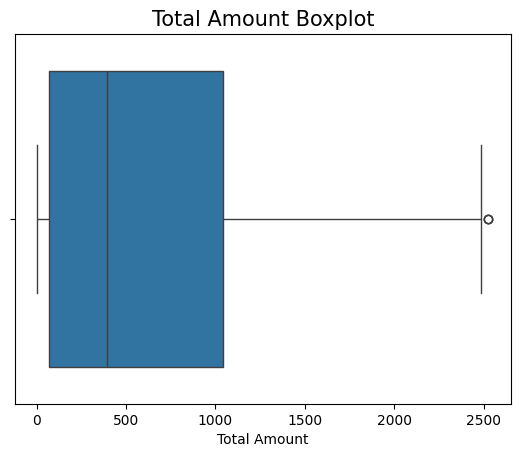

In [19]:
#Memeriksa Outlier pada Total Amount
sns.boxplot(x=df['Total Amount'])
plt.title('Total Amount Boxplot', size=15)
plt.show()

In [20]:
display(df.describe(), df.describe(include='object'))

,ID,Year Birth,Kid in Home,Teen in Home,Date Customer,Recency,Amount of Wines,Amount of Fruits,Amount of Meat Products,Amount of Fish Products,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Num of Purchases,Total Amount,Age
count,2237.000000,2237.000000,2237.000000,2237.000000,2237,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,...,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,1968.901654,0.444345,0.506482,2013-07-10 05:01:54.260169728,49.104604,303.995530,26.270451,166.916853,37.523022,...,0.072865,0.074654,0.072418,0.064372,0.013411,0.008941,0.149307,12.544032,605.743406,56.098346
min,0.000000,1940.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,29.000000
25%,2829.000000,1959.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,69.000000,48.000000
50%,5455.000000,1970.000000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,174.000000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,396.000000,55.000000
75%,8427.000000,1977.000000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,504.000000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1045.000000,66.000000
max,11191.000000,1996.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,2525.000000,85.000000
std,3245.118591,11.701917,0.538467,0.544593,NaN,28.956073,336.574382,39.715972,225.661158,54.639909,...,0.259974,0.262890,0.259237,0.245469,0.115052,0.094152,0.356471,7.205919,601.840466,11.701917


,Education,Relationship Status,Campaign Participation
count,2237,2237,2237
unique,4,2,2
top,Bachelor,In Relationship,No
freq,1127,1443,1629


In [21]:
df.nlargest(10, 'Total Amount')

,ID,Year Birth,Education,Relationship Status,Kid in Home,Teen in Home,Date Customer,Recency,Amount of Wines,Amount of Fruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total Num of Purchases,Total Amount,Age,Age Group,Campaign Participation
1179,5735,1991,Master,Single,0,0,2014-02-13,29,1156,120,...,1,0,0,0,0,17,2525,34,Dewasa Muda (26-35),Yes
1572,5350,1991,Master,Single,0,0,2014-02-13,29,1156,120,...,1,0,0,0,1,17,2525,34,Dewasa Muda (26-35),Yes
1492,1763,1988,Bachelor,In Relationship,0,0,2013-07-27,62,1259,172,...,1,1,0,0,1,28,2524,37,Dewasa (36-50),Yes
987,4580,1969,Bachelor,In Relationship,0,0,2013-10-25,46,1394,22,...,1,1,0,0,1,25,2486,56,Paruh Baya (51-65),Yes
1052,4475,1949,PhD,In Relationship,0,0,2013-02-16,82,1315,22,...,0,0,0,0,0,24,2440,76,Lansia (>65),No
1601,5453,1956,Master,In Relationship,0,0,2012-09-26,26,1083,108,...,0,1,0,0,0,23,2352,69,Lansia (>65),Yes
1458,10133,1970,Bachelor,Single,0,0,2014-02-12,16,1302,68,...,1,1,0,0,1,25,2349,55,Paruh Baya (51-65),Yes
1288,9010,1972,Master,In Relationship,0,0,2013-02-10,80,968,147,...,1,1,0,0,1,22,2346,53,Paruh Baya (51-65),Yes
943,5386,1953,Bachelor,In Relationship,0,0,2013-03-04,62,1111,24,...,1,1,0,0,1,18,2302,72,Lansia (>65),Yes
1301,6024,1953,Bachelor,In Relationship,0,0,2013-03-04,62,1111,24,...,1,1,0,0,1,18,2302,72,Lansia (>65),Yes


In [22]:
df.isnull().sum()

ID                          0
Year Birth                  0
Education                   0
Relationship Status         0
Kid in Home                 0
Teen in Home                0
Date Customer               0
Recency                     0
Amount of Wines             0
Amount of Fruits            0
Amount of Meat Products     0
Amount of Fish Products     0
Amount of Sweet Products    0
Amount of Gold Products     0
Num of Deals Purchases      0
Num of Web Purchases        0
Num of Catalog Purchases    0
Num of Store Purchases      0
Num of Web Visits Month     0
AcceptedCmp3                0
AcceptedCmp4                0
AcceptedCmp5                0
AcceptedCmp1                0
AcceptedCmp2                0
Complain                    0
Response                    0
Total Num of Purchases      0
Total Amount                0
Age                         0
Age Group                   0
Campaign Participation      0
dtype: int64

Akan dicek kembali, apakah ada data yang duplikat.

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.to_csv('Supermarket Customers Cleaned.csv', index=False)

## **Data Analysis**

Akan dilakukan analisis untuk mengetahui:
1. Apakah campaign yang dijalankan oleh supermarket berdampak terhadap total pengeluaran pelanggan?
2. Bagaimana perbedaan spending pelanggan berdasarkan karakteristik demografis seperti usia, status hubungan, dan tingkat pendidikan?
3. Segmentasi pelanggan seperti apa yang memiliki pengeluaran tertinggi?
4. Campaign seperti apa yang paling efektif untuk mendorong peningkatan pembelian dari segmen pelanggan tertentu?

### **Eksplorasi & Analisis Campaign Effectiveness**

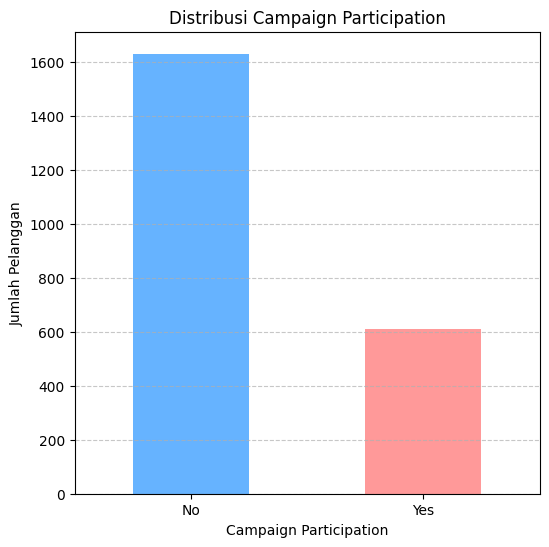

In [25]:
campaign_counts = df['Campaign Participation'].value_counts()

plt.figure(figsize=(6, 6))
campaign_counts.plot(kind='bar', color=['#66b3ff', '#ff9999'])
plt.ylabel('Jumlah Pelanggan')
plt.xlabel('Campaign Participation')
plt.title('Distribusi Campaign Participation')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### **Dampak Campaign terhadap Total Spending**
Rata-rata Total Spending berdasarkan Campaign

In [26]:
df.groupby('Campaign Participation')['Total Amount'].mean()

Campaign Participation
No     458.618171
Yes    999.932566
Name: Total Amount, dtype: float64

Visualisasi dengan Boxplot

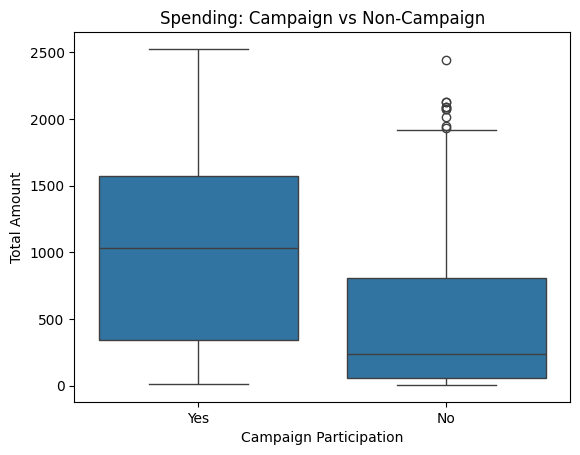

In [27]:
sns.boxplot(x='Campaign Participation', y='Total Amount', data=df)
plt.title('Spending: Campaign vs Non-Campaign')
plt.show()

Visualisasi dengan Heatmap (Correlation)

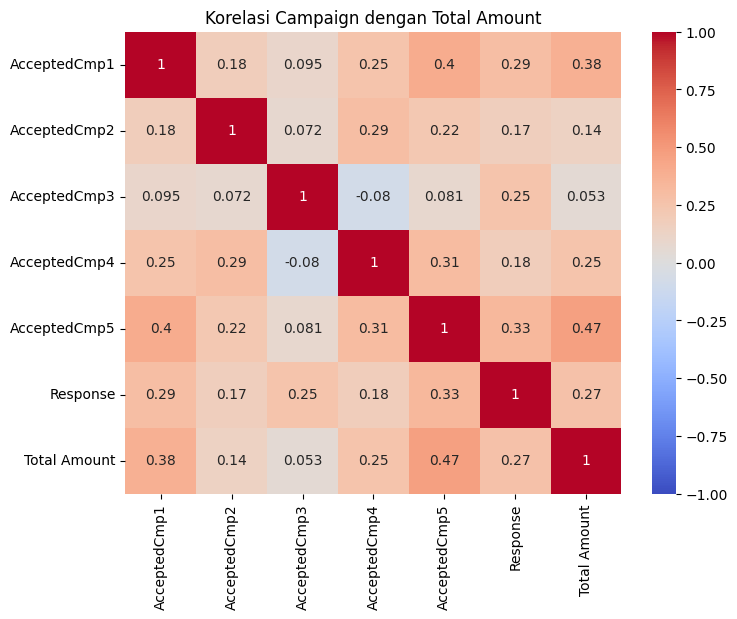

In [28]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Total Amount']
corr_matrix_campaign = df[campaign_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_campaign, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasi Campaign dengan Total Amount")
plt.show()

In [29]:
corr_matrix_campaign.to_csv("correlation_matrix.csv")

corr_long = corr_matrix_campaign.stack().reset_index()
corr_long.columns = ['Var1', 'Var2', 'Correlation']
corr_long.to_csv("correlation_long.csv", index=False)

Uji Statistik T-Test

In [30]:
yes = df[df['Campaign Participation'] == 'Yes']['Total Amount']
no = df[df['Campaign Participation'] == 'No']['Total Amount']

t_stat, p_val = ttest_ind(yes, no, equal_var=False)
print(f"T-stat: {t_stat}, P-value: {p_val}")

T-stat: 17.877397360617074, P-value: 5.691384761554529e-61


Ada perbedaan signifikan antara rata-rata total spending pelanggan yang mengikuti campaign dan yang tidak. Karena t-statistik-nya positif dan besar, kemungkinan besar rata-rata spending pelanggan yang ikut campaign (Yes) lebih tinggi dibanding yang tidak ikut (No). Campaign yang dilakukan terbukti berdampak secara signifikan terhadap peningkatan total spending pelanggan. Artinya, meskipun jumlah partisipan campaign tidak sebesar yang tidak ikut, mereka cenderung mengeluarkan lebih banyak uang.

#### **Segmentasi Efektivitas Campaign**

C:\Users\stefa\AppData\Local\Temp\ipykernel_2632\1837231290.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_means = df.groupby(['Age Group', 'Campaign Participation'])['Total Amount'].mean().unstack()


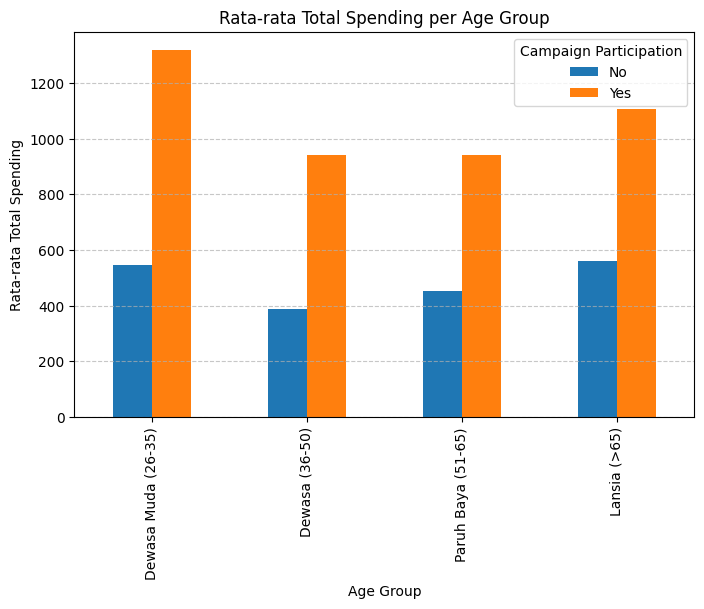

In [31]:
age_group_means = df.groupby(['Age Group', 'Campaign Participation'])['Total Amount'].mean().unstack()
age_group_means.plot(kind='bar', figsize=(8, 5))
plt.title('Rata-rata Total Spending per Age Group')
plt.ylabel('Rata-rata Total Spending')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

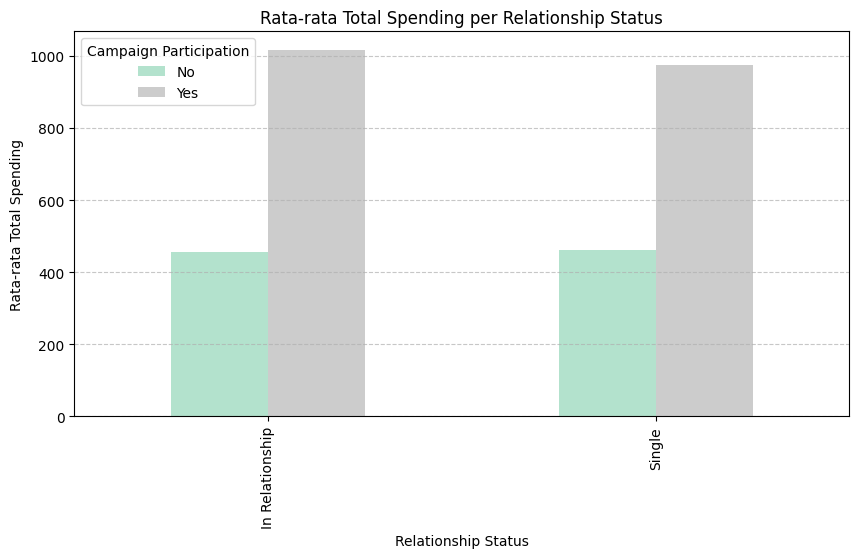

In [32]:
relationship_means = df.groupby(['Relationship Status', 'Campaign Participation'])['Total Amount'].mean().unstack()
relationship_means.plot(kind='bar', colormap='Pastel2', figsize=(10, 5))
plt.title('Rata-rata Total Spending per Relationship Status')
plt.ylabel('Rata-rata Total Spending')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

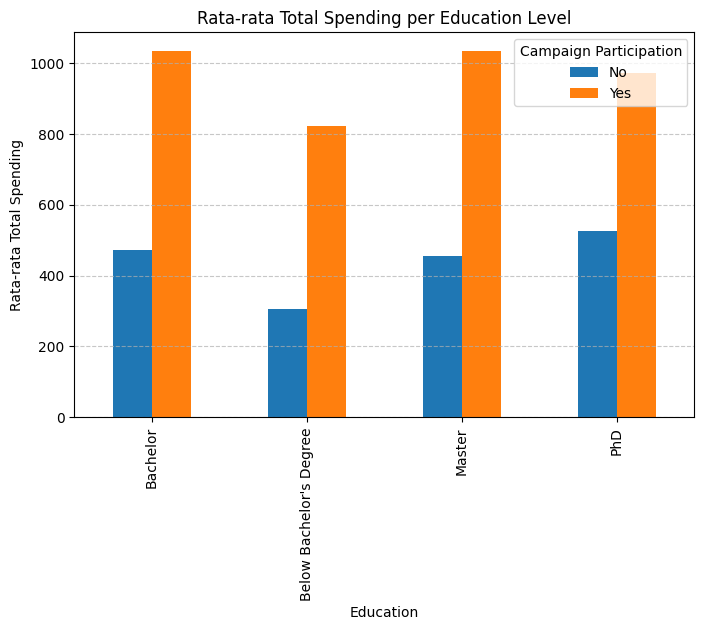

In [33]:
education_means = df.groupby(['Education', 'Campaign Participation'])['Total Amount'].mean().unstack()
education_means.plot(kind='bar', figsize=(8, 5))
plt.title('Rata-rata Total Spending per Education Level')
plt.ylabel('Rata-rata Total Spending')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### **Insight dan Rekomendasi**

Secara umum, campaign efektif terhadap total spending customer. Hal ini dapat dilihat dari rata-rata Total Spending Customer "Yes" sebesar 1000, sedangkan rata-rata Total Spending Customer "No" sebesar 459. Lalu, campaign lebih efektif untuk kelompok tertentu, seperti Kategori Usia Dewasa Muda, Customer dengan Relationship Status "In Relationship", dan Customer dengan Education Level Bachelor dan Master. Rekomendasi strategis untuk meningkatkan efektivitas campaign berikutnya berdasarkan hasil analisis ialah Targeted Campaign untuk Segmen Potensial, misalnya buat campaign yang sesuai dengan gaya hidup Customer Dewasa Muda, buat promo atau diskon untuk pasangan, Weekend Deals, atau program loyalty berjenjang. Bisa juga dilakukan survey singkat setelah campaign selesai agar perusahaan dapat mengetahui tingkat kepuasan pelanggan terhadap campaign tersebut atau saran untuk campaign kedepannya yang mungkin dapat menjadi pertimbangan perusahaan juga.

### **Analisis Karakteristik Pelanggan dengan Spending Tertinggi**

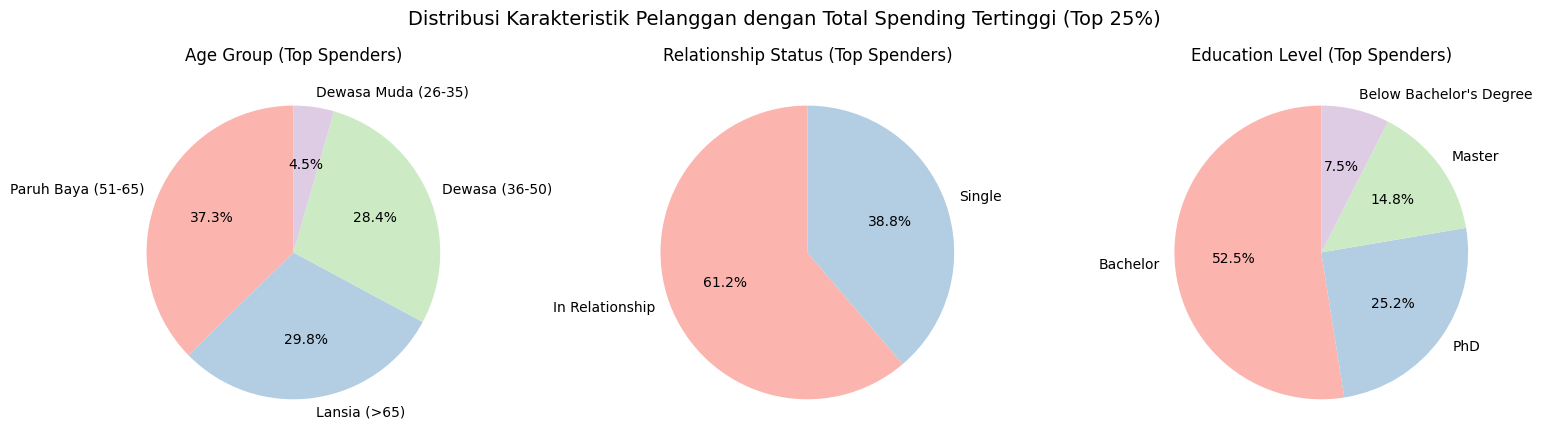

In [34]:
# Ambil 25% pelanggan dengan total spending tertinggi
top_spenders = df[df['Total Amount'] >= df['Total Amount'].quantile(0.75)]

# Buat plot distribusi karakteristik pelanggan dengan spending tertinggi
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
plt.subplots_adjust(wspace=0.4)

# 1. Age Group
top_spenders['Age Group'].value_counts(normalize=True).plot(
    kind='pie',
    ax=axs[0],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors
)
axs[0].set_title('Age Group (Top Spenders)')
axs[0].set_ylabel('')

# 2. Relationship Status
top_spenders['Relationship Status'].value_counts(normalize=True).plot(
    kind='pie',
    ax=axs[1],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors
)
axs[1].set_title('Relationship Status (Top Spenders)')
axs[1].set_ylabel('')

# 3. Education
top_spenders['Education'].value_counts(normalize=True).plot(
    kind='pie',
    ax=axs[2],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors
)
axs[2].set_title('Education Level (Top Spenders)')
axs[2].set_ylabel('')

plt.suptitle('Distribusi Karakteristik Pelanggan dengan Total Spending Tertinggi (Top 25%)', fontsize=14)
plt.show()

Berdasarkan ketiga Bar Chart di atas, Karakteristik Customer dengan Total Spending Tertinggi adalah Customer Paruh Baya, Customer In Relationship, dan Customer Lulusan Bachelor.

### **Analisis Spending Berdasarkan Demografi**

C:\Users\stefa\AppData\Local\Temp\ipykernel_2632\766398332.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Group')['Total Amount'].mean().plot(


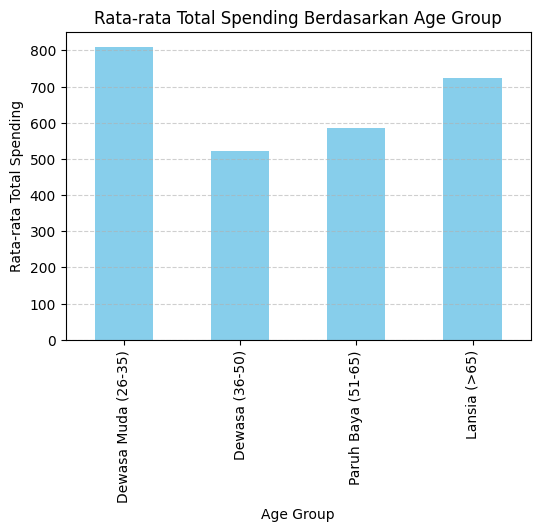

In [35]:
df.groupby('Age Group')['Total Amount'].mean().plot(
    kind='bar',
    color='skyblue',
    figsize=(6, 4),
    title='Rata-rata Total Spending Berdasarkan Age Group'
)
plt.ylabel('Rata-rata Total Spending')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Rata-rata Tertinggi Total Spending Berdasarkan Age Group adalah Customer Dewasa Muda. Untuk hal ini, kelompok usia tersebut sesuai dengan hasil analisis dengan Customer yang Menerima Campaign.

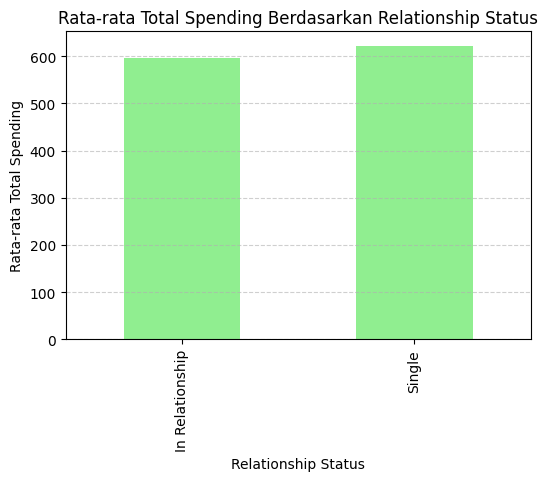

In [36]:
df.groupby('Relationship Status')['Total Amount'].mean().plot(
    kind='bar',
    color='lightgreen',
    figsize=(6, 4),
    title='Rata-rata Total Spending Berdasarkan Relationship Status'
)
plt.ylabel('Rata-rata Total Spending')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Rata-rata Tertinggi Total Spending Berdasarkan Relationship Status adalah Customer Single. Untuk hal ini, hasilnya berbeda dengan hasil analisis berdasarkan Customer yang Menerima Campaign dan Top Spenders.

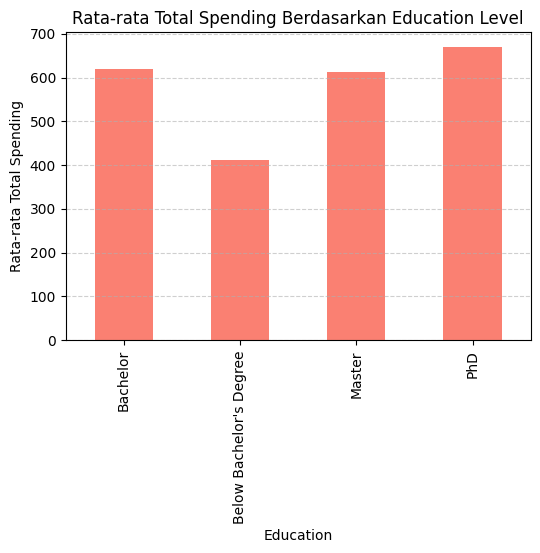

In [37]:
df.groupby('Education')['Total Amount'].mean().plot(
    kind='bar',
    color='salmon',
    figsize=(6, 4),
    title='Rata-rata Total Spending Berdasarkan Education Level'
)
plt.ylabel('Rata-rata Total Spending')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Rata-rata Tertinggi Total Spending Berdasarkan Education Level adalah Customer lulusan PhD. Untuk hal ini, hasilnya berbeda dengan hasil analisis Customer yang Menerima Campaign dan Top Spenders.

## **Kesimpulan**

Berdasarkan hasil analisis, campaign yang dilakukan oleh supermarket terbukti efektif dalam meningkatkan total spending pelanggan. Uji statistik menunjukkan bahwa terdapat perbedaan yang signifikan antara pelanggan yang mengikuti campaign dan yang tidak, dengan rata-rata spending pelanggan yang ikut campaign sebesar ±1000, jauh lebih tinggi dibanding pelanggan yang tidak ikut (±459). Campaign juga terlihat lebih efektif pada segmen-segmen pelanggan tertentu, di antaranya:
- Kelompok usia Dewasa Muda (26–35 tahun)
- Pelanggan dengan status hubungan “In Relationship”
- Pelanggan dengan tingkat pendidikan Bachelor dan Master

Karakteristik pelanggan dengan total spending tertinggi secara umum didominasi oleh:
- Usia Dewasa Muda
- Status hubungan “In Relationship”
- Tingkat pendidikan PhD

Faktor demografis seperti usia, status hubungan, dan pendidikan memiliki pengaruh terhadap rata-rata total spending pelanggan:
- Pelanggan usia Dewasa Muda (26–35) menunjukkan pengeluaran tertinggi dibandingkan kelompok usia lainnya.
- Pelanggan yang Single memiliki rata-rata pengeluaran sedikit lebih tinggi daripada yang In Relationship, meskipun selisihnya tidak terlalu besar.
- Tingkat pendidikan menunjukkan tren yang konsisten, di mana pelanggan dengan gelar PhD memiliki rata-rata pengeluaran tertinggi, diikuti oleh Bachelor dan Master, sementara Below Bachelor's Degree memiliki pengeluaran paling rendah.

Rekomendasi Strategi Campaign Selanjutnya :

1. Fokus pada Segmen Usia Dewasa Muda (26–35 tahun)
Pelanggan di kelompok usia ini memiliki total spending tertinggi dan merespons campaign dengan baik. Supermarket dapat merancang campaign dengan pendekatan yang relevan bagi mereka, seperti Promo bundling untuk kebutuhan sehari-hari, Diskon eksklusif melalui aplikasi atau e-voucher, dan Program loyalitas dengan sistem poin.

2. Sesuaikan Campaign Berdasarkan Status Hubungan
Meski perbedaannya kecil, pelanggan Single memiliki spending sedikit lebih tinggi. Supermarket bisa menyesuaikan konten promosi seperti: Campaign bertema “Treat Yourself” untuk pelanggan single, Penawaran pasangan/keluarga untuk pelanggan "In Relationship".

3. Tingkatkan Target Campaign untuk Pelanggan dengan Pendidikan Lebih Tinggi
Pelanggan dengan gelar PhD, Bachelor, dan Master cenderung memiliki daya beli yang lebih tinggi. Strategi promosi bisa diarahkan dengan Produk berkualitas premium atau Program eksklusif seperti “Member Privilege” atau “Smart Shopper Club”.

